<a href="https://colab.research.google.com/github/soltiste/ii-in-economi/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).
2. Обучите классификатор с линейным ядром, параметром C = 100000
и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно
разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть
с решением классической задачи SVM для линейно разделимой выборки.
3. Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите
внимание, что в качестве ответа нужно привести номера объектов
в возрастающем порядке через запятую. Нумерация начинается с
1

In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
import matplotlib.pyplot as plt

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/svm-data.csv',
                         header=None, names=['1', '2', '3'])
X_train, y_train = data_train[['2', '3']], data_train[['1']]
data_train

,1,2,3
0,0.0,0.70,0.29
1,1.0,0.23,0.55
2,0.0,0.72,0.42
3,0.0,0.98,0.68
4,0.0,0.48,0.39
5,1.0,0.34,0.73
6,0.0,0.44,0.06
7,1.0,0.40,0.74
8,0.0,0.18,0.18
9,1.0,0.53,0.53


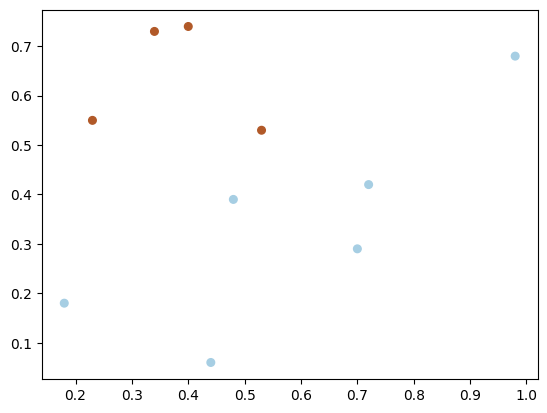

In [35]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

In [36]:
clf = svm.SVC(kernel='linear', C=100000, random_state=241)
clf.fit(X_train, y_train)
number = clf.support_ + 1
print('номера опорных векторов: ',*number)

номера опорных векторов:  4 5 10


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


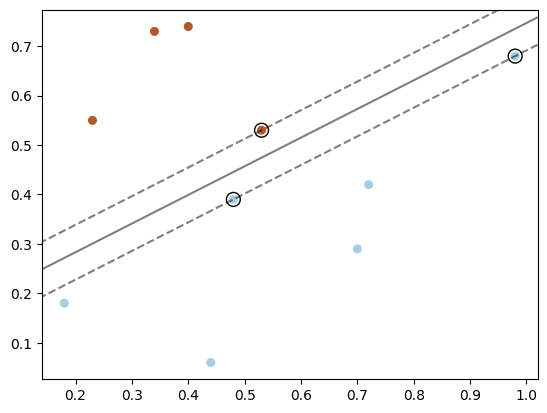

In [32]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()